# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

# collecting data

In [ ]:
geral = pd.read_csv('MICRODADOS_ENEM_2022.csv',  usecols=['Q006','TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA','NO_MUNICIPIO_PROVA','SG_UF_PROVA',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO'], encoding = 'cp1252', sep = ';', nrows = 3800000)  # ou 'cp1252'



In [ ]:
geral.shape

(268381, 15)

# Grande Replace

In [ ]:
faixa_etaria = {1:'Menor de 17 anos',
                2: '17 anos',
                3: '18 anos',
                4: '19 anos',
                5: '20 anos',
                6: '21 anos',
                7: '22 anos',
                8: '23 anos',
                9: '24 anos',
                10: '25 anos',
                11:	'Entre 26 e 30 anos',
                12:	'Entre 31 e 35 anos',
                13:	'Entre 36 e 40 anos',
                14:	'Entre 41 e 45 anos',
                15:	'Entre 46 e 50 anos',
                16:	'Entre 51 e 55 anos',
                17:	'Entre 56 e 60 anos',
                18:	'Entre 61 e 65 anos',
                19:	'Entre 66 e 70 anos',
                20:	'Maior de 70 anos'
                }

cor_raca = {0:'Não declarado',
            1: 'Branca',
            2: 'Preta',
            3: 'Parda',
            4: 'Amarela',
            5: 'Indígena',
            6: 'Não dispõe da informação'
            }

gender = {'M': 'Masculino',
          'F': 'Feminino'}

estado_civil = {0: 'Não informado',
                1: 'Solteiro(a)',
                2: 'Casado(a)/Mora com companheiro(a)',
                3: 'Divorciado(a)/Desquitado(a)/Separado(a)',
                4: 'Viúvo(a)'}

situacao_conclusao = {1: 'Já concluí o Ensino Médio',
                      2: 'Estou cursando e concluirei o Ensino Médio em 2022',
                      3: 'Estou cursando e concluirei o Ensino Médio após 2022',
                      4: 'Não concluí e não estou cursando o Ensino Médio'
}

ano_conclusao ={0:'Não informado',
                1:'2021',
                2:'2020',
                3:'2019',
                4:'2018',
                5:'2017',
                6:'2016',
                7:'2015',
                8:'2014',
                9:'2013',
                10:	'2012',
                11:	'2011',
                12:	'2010',
                13:	'2009',
                14:	'2008',
                15:	'2007',
                16:	'Antes de 2007',
}

tipo_escola ={1: 'Não Respondeu',
              2: 'Pública',
              3: 'Privada'
             }
renda_familiar = {'A': 'Nenhuma Renda',
                  'B': 'Até R$ 1.212,00',
                  'C': 'De R$ 1.212,01 até R$ 1.818,00.',
                  'D': 'De R$ 1.818,01 até R$ 2.424,00.',
                  'E': 'De R$ 2.424,01 até R$ 3.030,00.',
                  'F': 'De R$ 3.030,01 até R$ 3.636,00.',
                  'G': 'De R$ 3.636,01 até R$ 4.848,00.',
                  'H': 'De R$ 4.848,01 até R$ 6.060,00.',
                  'I': 'De R$ 6.060,01 até R$ 7.272,00.',
                  'J': 'De R$ 7.272,01 até R$ 8.484,00.',
                  'K': 'De R$ 8.484,01 até R$ 9.696,00.',
                  'L': 'De R$ 9.696,01 até R$ 10.908,00.',
                  'M': 'De R$ 10.908,01 até R$ 12.120,00.',
                  'N': 'De R$ 12.120,01 até R$ 14.544,00.',
                  'O': 'De R$ 14.544,01 até R$ 18.180,00.',
                  'P': 'De R$ 18.180,01 até R$ 24.240,00.',
                  'Q': 'Acima de R$ 24.240,00.',
                }


geral['TP_FAIXA_ETARIA'] = geral['TP_FAIXA_ETARIA'].replace(faixa_etaria)

geral['TP_COR_RACA'] = geral['TP_COR_RACA'].replace(cor_raca)

geral['TP_SEXO'] = geral['TP_SEXO'].replace(gender)

geral['TP_ESTADO_CIVIL'] = geral['TP_ESTADO_CIVIL'].replace(estado_civil)

geral['TP_ST_CONCLUSAO'] = geral['TP_ST_CONCLUSAO'].replace(situacao_conclusao)

geral['TP_ANO_CONCLUIU'] = geral['TP_ANO_CONCLUIU'].replace(ano_conclusao)

geral['TP_ESCOLA'] = geral['TP_ESCOLA'].replace(tipo_escola)

geral['Q006'] = geral['Q006'].replace(renda_familiar)

In [ ]:
geral.rename(columns = {'Q006': 'RENDA_FAMILIAR'}, inplace = True)
col = geral.pop('RENDA_FAMILIAR')
geral.insert(0,col.name,col)
geral.head()

# BLOCO DO EU SOZINHO

In [ ]:
candidatos_bezerros = geral[geral['NO_MUNICIPIO_PROVA'] == 'Bezerros']

notas_bezerros_redacao = candidatos_bezerros['NU_NOTA_REDACAO'].dropna().value_counts().sort_values
notas_bezerros_mt = candidatos_bezerros['NU_NOTA_MT'].dropna().value_counts().sort_values
notas_bezerros_ch = candidatos_bezerros['NU_NOTA_CH'].dropna().value_counts().sort_values
notas_bezerros_cn = candidatos_bezerros['NU_NOTA_CN'].dropna().value_counts().sort_values
notas_bezerros_lt = candidatos_bezerros['NU_NOTA_LC'].dropna().value_counts().sort_values


media_candidatos = (candidatos_bezerros['NU_NOTA_CH'] + candidatos_bezerros['NU_NOTA_MT'] + candidatos_bezerros['NU_NOTA_CN'] +
                    candidatos_bezerros['NU_NOTA_LC'] + candidatos_bezerros['NU_NOTA_REDACAO'])/5

# Graph View

In [ ]:
media_candidatos = (geral['NU_NOTA_CH'] + geral['NU_NOTA_MT'] + geral['NU_NOTA_CN'] +
                    geral['NU_NOTA_LC'] + geral['NU_NOTA_REDACAO'])/5
geral['media_candidatos'] = media_candidatos

In [ ]:
privados = geral[geral['TP_ESCOLA'] == 'Privada']
publicos = geral[geral['TP_ESCOLA'] == 'Pública']

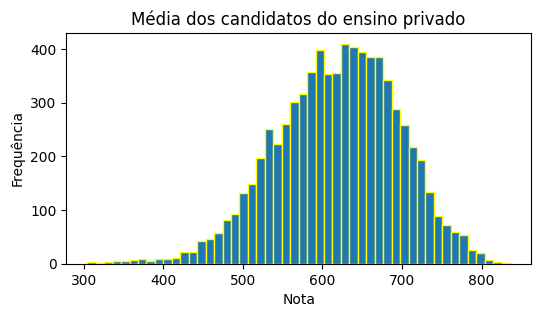

In [ ]:
# plotagem de histograma da media dos candidatos oriundos do ensino privado

plt.figure(figsize=(6,3))
plt.hist(privados['media_candidatos'], bins = 50,
         edgecolor = 'yellow')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.title('Média dos candidatos do ensino privado')
plt.show()

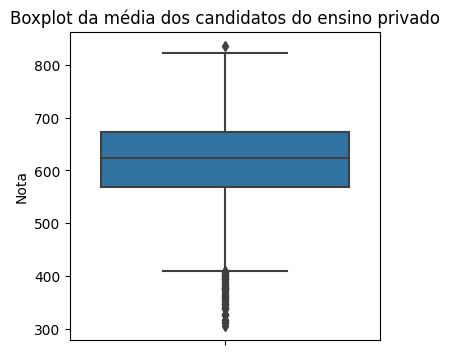

In [ ]:
#boxplot dos candidatos do ensino privado
plt.figure(figsize=(4,4))
sns.boxplot(y = 'media_candidatos', data = privados)
plt.ylabel('Nota')
plt.title('Boxplot da média dos candidatos do ensino privado')
plt.show()

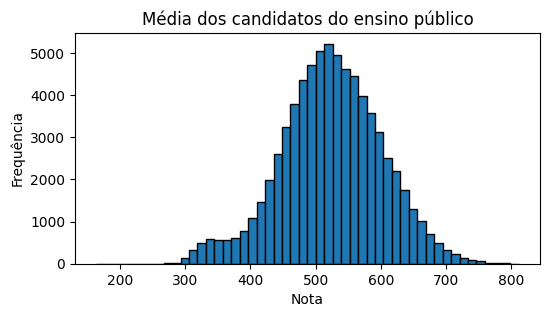

In [ ]:
# plotagem de histograma da media dos candidatos oriundos do ensino publico
plt.figure(figsize=(6,3))
plt.hist(publicos['media_candidatos'], bins = 50,
         edgecolor = 'black')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.title('Média dos candidatos do ensino público')
plt.show()

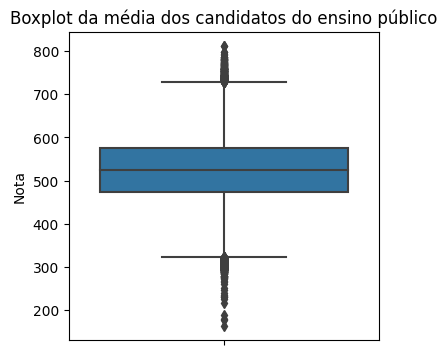

In [ ]:
#boxplot dos candidatos do ensino publico
plt.figure(figsize=(4,4))
sns.boxplot(y = 'media_candidatos', data = publicos)
plt.ylabel('Nota')
plt.title('Boxplot da média dos candidatos do ensino público')
plt.show()

# Modelo de predição

In [ ]:
#desenvolver modelo de ML
X = geral_valido.drop(columns = ['RENDA_FAMILIAR', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'media_candidatos'])
# variaveis exogenas 'TP_COR_RACA', 'TP_ESCOLA'
y = geral_valido['media_candidatos'] # variavel endogena

encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Criar um novo DataFrame com a entrada
new_entry = pd.DataFrame([['Indígena', 'Pública']], columns=['TP_COR_RACA', 'TP_ESCOLA'])

# Codificar a nova entrada
new_entry_encoded = encoder.transform(new_entry)

# Prever a média do ENEM para a nova entrada
predictions = model.predict(new_entry_encoded)
predictions

array([485.56750769])

In [ ]:
geral_valido = geral[geral['media_candidatos'].notna()]

In [ ]:
geral.drop(columns = ['RENDA_FAMILIAR', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'media_candidatos'],
)

In [ ]:
X = geral.drop(columns=['genre'])
y = ms['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeClassifier()
model.fit(X, y)
model.fit(X_train, y_train)


predictions = model.predict(X_test)
predictions = model.predict([[21,1],[25,0]])

score = accuracy_score(y_test, predictions)
score

C:\Users\athil.DESKTOP-7MR45V4\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
